In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 29_09_2022 02_33_00.xlsx')

In [5]:
filtrado = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade']]
filtrado

,Competencia Evolucao,Classificacao final,Evolucao,Idade
0,NaN,Não Informado,Segue Internado,22.0
1,NaN,Não Informado,Segue Internado,69.0
2,NaN,Não Informado,Segue Internado,65.0
3,NaN,COVID-19,Segue Internado,58.0
4,2021_05,COVID-19,Óbito,91.0
...,...,...,...,...
184431,2021_02,COVID-19,Óbito,85.0
184432,2021_09,COVID-19,Cura,46.0
184433,2021_04,COVID-19,Óbito,56.0
184434,2020_07,SRAG não especificado,Cura,85.0


In [6]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

c:\Users\ryan-rosa\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado

,Competencia Evolucao,Classificacao final,Evolucao,Idade
4,2021_05,COVID-19,Óbito,80 e mais
6,2022_02,COVID-19,Óbito,80 e mais
7,2021_03,COVID-19,Óbito,40-59 anos
8,2021_03,COVID-19,Óbito,40-59 anos
10,2021_03,COVID-19,Óbito,60-79 anos
...,...,...,...,...
184425,2021_05,COVID-19,Óbito,60-79 anos
184428,2021_03,COVID-19,Óbito,40-59 anos
184430,2021_07,COVID-19,Óbito,20-39 anos
184431,2021_02,COVID-19,Óbito,80 e mais


In [8]:
total_obitos = filtrado.groupby('Competencia Evolucao').count()
total_obitos = total_obitos.drop('2020_03')
total_obitos.head()

,Classificacao final,Evolucao,Idade
Competencia Evolucao,,,
2020_04,60,60,60
2020_05,182,182,182
2020_06,440,440,440
2020_07,1391,1391,1391
2020_08,1605,1605,1605


In [9]:
separaIdade = filtrado.groupby(['Idade','Competencia Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao
Idade     Competencia Evolucao                               
0-11 anos 2020_05                                 1         1
          2020_07                                 1         1
          2020_08                                 2         2
          2020_09                                 1         1
          2020_10                                 3         3

In [10]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Evolucao
2022_04    0.000000
2022_05    0.000000
2022_06    0.623701
2022_07    0.950119
2022_08    0.282486
2022_09    0.561798
2022_10    0.000000
2022_11    0.000000
Name: Proporcao, dtype: float64

In [11]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Evolucao
2022_04    1.015228
2022_05    0.684932
2022_06    0.207900
2022_07    0.000000
2022_08    0.000000
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
Name: Proporcao, dtype: float64

In [12]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Evolucao
2022_04    5.583756
2022_05    2.739726
2022_06    2.910603
2022_07    2.612827
2022_08    1.412429
2022_09    1.685393
2022_10    1.754386
2022_11    4.761905
Name: Proporcao, dtype: float64

In [13]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Evolucao
2022_04    12.690355
2022_05     9.931507
2022_06    11.018711
2022_07     8.551069
2022_08     9.604520
2022_09    11.797753
2022_10    15.789474
2022_11     9.523810
Name: Proporcao, dtype: float64

In [14]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79.drop(['2020_03'])
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Evolucao
2022_04    44.670051
2022_05    44.863014
2022_06    41.787942
2022_07    44.180523
2022_08    49.152542
2022_09    43.820225
2022_10    47.368421
2022_11    28.571429
Name: Proporcao, dtype: float64

In [15]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80.drop(['2020_03'])
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Evolucao
2022_04    36.040609
2022_05    41.780822
2022_06    43.451143
2022_07    43.705463
2022_08    39.548023
2022_09    42.134831
2022_10    35.087719
2022_11    57.142857
Name: Proporcao, dtype: float64

In [16]:
eixo_x = idade80.to_frame()
eixo_x = eixo_x.reset_index()
eixo_x = eixo_x['Competencia Evolucao']
eixo_x

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
23    2022_03
24    2022_04
25    2022_05
26    2022_06
27    2022_07
28    2022_08
29    2022_09
30    2022_10
31    2022_11
Name: Competencia Evolucao, dtype: object

In [17]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [18]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

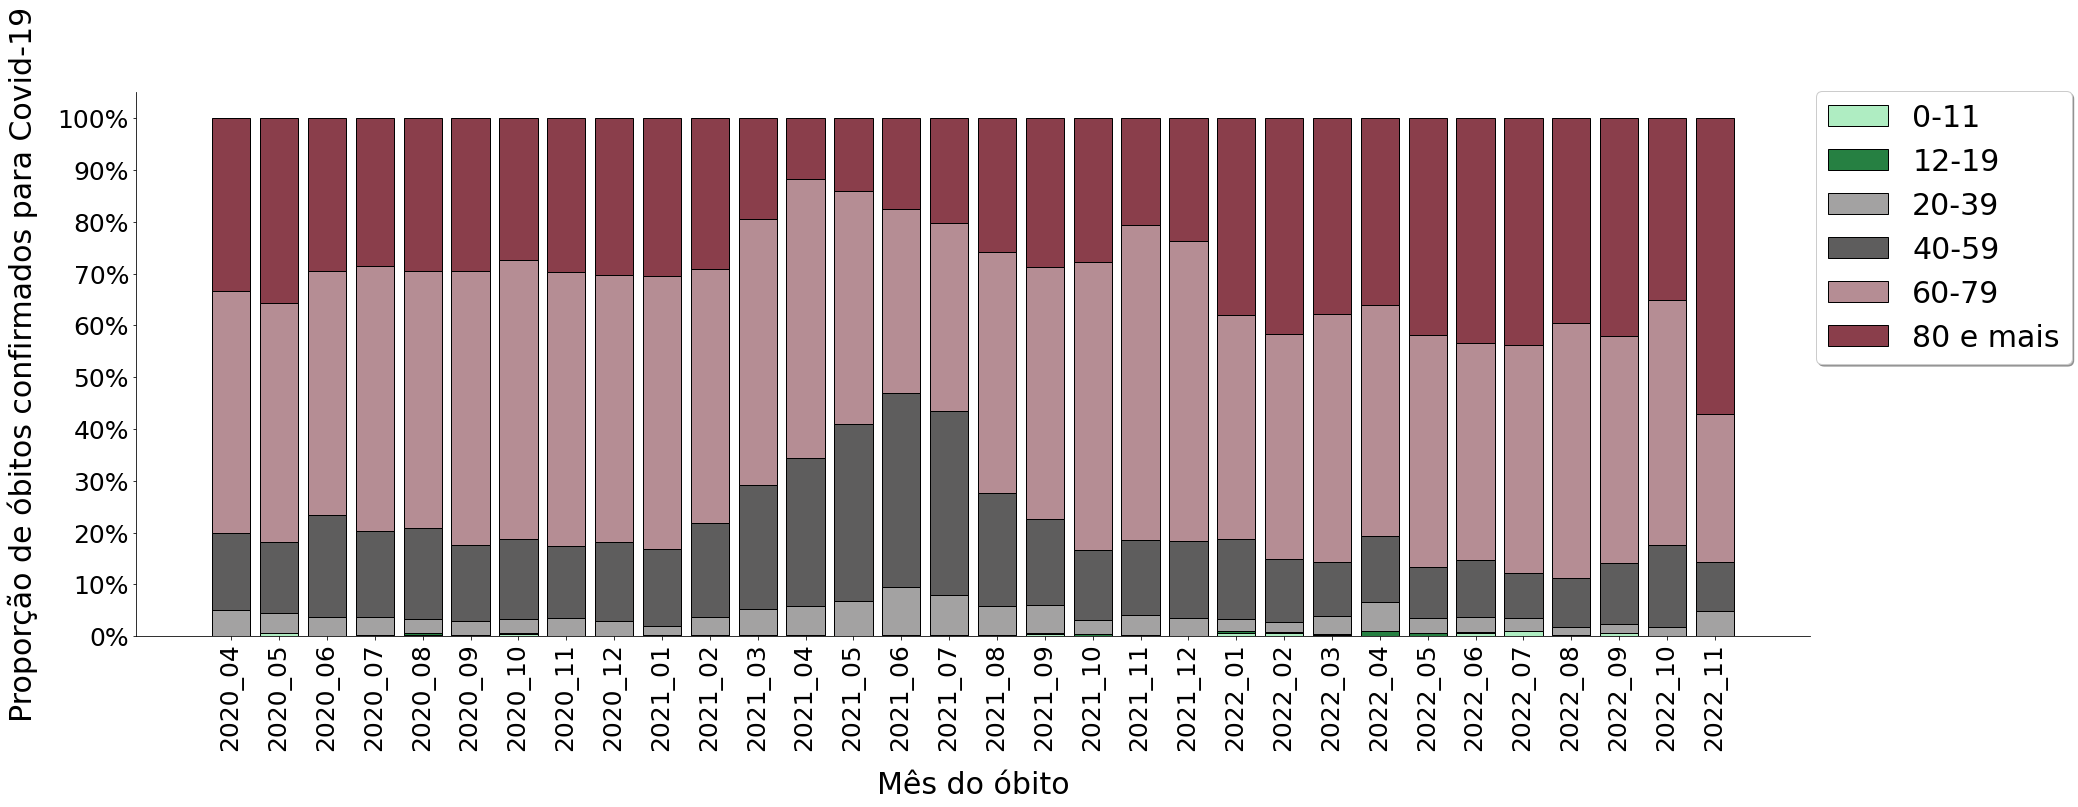

In [19]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(eixo_x,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(eixo_x,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(eixo_x,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(eixo_x,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(eixo_x,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitosConfirmados-Covid.png',dpi=720,bbox_inches='tight')